In [11]:
from dataclasses import dataclass


@dataclass
class Floresta:
    arvores: list[int]

class Macaco:
    def __init__(self, pos):
        self.posicao = pos
        # linha_de_visao: bool
        pulos_realizados: int = 0
    def pular(self, arvore_destino: int):
        pass

In [74]:
floresta_teste1 = Floresta([7, 3, 6, 6, 6, 15, 5, 1, 9, 2])
floresta_teste2 = Floresta([3, 4, 3])
floresta_teste3 = Floresta([3, 4, 3, 1])

obi = Macaco(0)

Encontrei o melhor alvo
Saltei para a posição 1


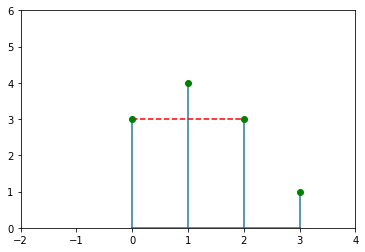

Encontrei o melhor alvo
Saltei para a posição 2


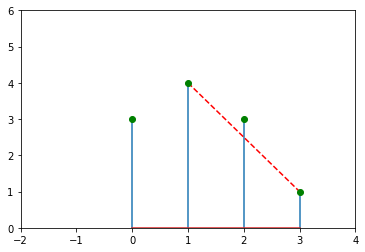

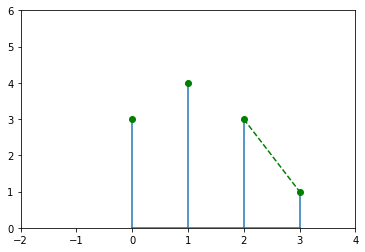

Saltei para o final!
3


In [75]:
from matplotlib import pyplot as plt
import numpy as np

def coeficiente_angular(x: tuple[int], y: tuple[int], ponto1: int, ponto2: int) -> float:
    coeficiente = ((y[ponto1] - y[ponto2]) / (x[ponto1] - x[ponto2]))
    return coeficiente


def intercepto(x: tuple[int], y: tuple[int], ponto1: int, ponto2: int) -> int:
    return y[ponto1] - (x[ponto1] * coeficiente_angular(x, y, ponto1, ponto2))


def linha(x: tuple[int], y: tuple[int], ponto1: int, ponto2: int) -> tuple:
    inclinacao = coeficiente_angular(x, y, ponto1, ponto2)
    icepto = intercepto(x, y, ponto1, ponto2)
    x1 = np.linspace(ponto1, ponto2, abs(ponto1-ponto2)+1)
    y1 = np.array(inclinacao * x1 + icepto)
    return x1,y1


def desenhar_linha_de_visao(floresta: list[int], x1: list, y1: list, floresta_original: list, possivel: bool) -> None:
    if possivel:
        color = 'green'
    else:
        color ='red'
    plt.plot(x1, y1, color=color, linestyle='--')
    desenhar_arvores(floresta_original)
    plt.xlim(-2, len(floresta))
    plt.ylim(0, max(floresta)+2)
    plt.show()

def desenhar_arvores(floresta: list[int]) -> None:
    plt.stem(floresta, markerfmt='og', linefmt='-')
    plt.xlim(-2, len(floresta))
    plt.ylim(0, max(floresta)+2)

def main():
    floresta = floresta_teste3
    x, y = list(zip(*enumerate(floresta.arvores)))
    ponto1 = 0
    ponto2 = 2
    contador = 0
    while len(y[ponto1:]) > 2:
        x1,y1 = linha(x, y, ponto1, ponto2)
        if not all(y[ponto1:ponto2+1] <= y1):
            print('Encontrei o melhor alvo')
            print(f'Saltei para a posição {ponto2-1}')
            desenhar_linha_de_visao(floresta.arvores, x1, y1, floresta_original=y, possivel=False)
            ponto1, ponto2 = ponto2-1, ponto2+1
            contador += 1
        else:
            print("Escolhendo um alvo... Eu consigo um salto melhor!")
            desenhar_linha_de_visao(floresta.arvores, x1, y1, floresta_original=y, possivel=True)
            ponto2 += 1
    else:
        contador += 1

    x1,y1 = linha(x, y, len(y)-2, len(y)-1)
    desenhar_linha_de_visao(floresta.arvores, x1, y1, floresta_original=y, possivel=True)
    print('Saltei para o final!')
    print(contador)

if __name__ == main():
    main()